# Import dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_local = pd.read_csv(r'C:\Users\GabanBunny MSI\Downloads\Project\Personal-Project\Mobile App\Farmers Friend\tests_2\benchmark_results.csv')
df_gemini = pd.read_csv(r'C:\Users\GabanBunny MSI\Downloads\Project\Personal-Project\Mobile App\Farmers Friend\tests_2\benchmark_gemini_results_final.csv')


In [2]:
df_local

,True Label,Filename,Predicted Label
0,Apple___alternaria_leaf_spot,112927.jpg,Tomato___Late_blight
1,Apple___alternaria_leaf_spot,112928.jpg,Apple___Cedar_apple_rust
2,Apple___alternaria_leaf_spot,112931.jpg,Apple___Black_rot
3,Apple___alternaria_leaf_spot,112934.jpg,Apple___Cedar_apple_rust
4,Apple___alternaria_leaf_spot,112935.jpg,Apple___healthy
...,...,...,...
2585,Potato___mosaic_virus,112877.jpg,Tomato___Late_blight
2586,Potato___mosaic_virus,112879.jpg,Tomato___Spider_mites Two-spotted_spider_mite
2587,Potato___mosaic_virus,112892.jpg,Strawberry___Leaf_scorch
2588,Potato___mosaic_virus,112904.jpg,Tomato___Spider_mites Two-spotted_spider_mite


In [3]:
df_gemini

,True Label,Filename,Gemini Prediction
0,Apple___alternaria_leaf_spot,112927.jpg,Apple___rust
1,Apple___alternaria_leaf_spot,112928.jpg,Apple___brown_spot
2,Apple___alternaria_leaf_spot,112931.jpg,Apple___alternaria_leaf_spot
3,Apple___alternaria_leaf_spot,112934.jpg,Apple___rust
4,Apple___alternaria_leaf_spot,112935.jpg,Apple___healthy
...,...,...,...
2585,Potato___mosaic_virus,112877.jpg,Potato___mosaic_virus
2586,Potato___mosaic_virus,112879.jpg,Potato___healthy
2587,Potato___mosaic_virus,112892.jpg,Potato___mosaic_virus
2588,Potato___mosaic_virus,112904.jpg,Potato___mosaic_virus


# 1. Explore the data

## Local Model

In [4]:
df_local.shape

(2590, 3)

In [5]:
df_local.head()

,True Label,Filename,Predicted Label
0,Apple___alternaria_leaf_spot,112927.jpg,Tomato___Late_blight
1,Apple___alternaria_leaf_spot,112928.jpg,Apple___Cedar_apple_rust
2,Apple___alternaria_leaf_spot,112931.jpg,Apple___Black_rot
3,Apple___alternaria_leaf_spot,112934.jpg,Apple___Cedar_apple_rust
4,Apple___alternaria_leaf_spot,112935.jpg,Apple___healthy


In [6]:
df_local.describe

<bound method NDFrame.describe of                         True Label    Filename  \
0     Apple___alternaria_leaf_spot  112927.jpg   
1     Apple___alternaria_leaf_spot  112928.jpg   
2     Apple___alternaria_leaf_spot  112931.jpg   
3     Apple___alternaria_leaf_spot  112934.jpg   
4     Apple___alternaria_leaf_spot  112935.jpg   
...                            ...         ...   
2585         Potato___mosaic_virus  112877.jpg   
2586         Potato___mosaic_virus  112879.jpg   
2587         Potato___mosaic_virus  112892.jpg   
2588         Potato___mosaic_virus  112904.jpg   
2589         Potato___mosaic_virus  112920.jpg   

                                    Predicted Label  
0                              Tomato___Late_blight  
1                          Apple___Cedar_apple_rust  
2                                 Apple___Black_rot  
3                          Apple___Cedar_apple_rust  
4                                   Apple___healthy  
...                                      

## Gemini

In [7]:
df_gemini.shape

(2590, 3)

In [8]:
df_gemini.head()

,True Label,Filename,Gemini Prediction
0,Apple___alternaria_leaf_spot,112927.jpg,Apple___rust
1,Apple___alternaria_leaf_spot,112928.jpg,Apple___brown_spot
2,Apple___alternaria_leaf_spot,112931.jpg,Apple___alternaria_leaf_spot
3,Apple___alternaria_leaf_spot,112934.jpg,Apple___rust
4,Apple___alternaria_leaf_spot,112935.jpg,Apple___healthy


In [9]:
df_gemini.describe

<bound method NDFrame.describe of                         True Label    Filename             Gemini Prediction
0     Apple___alternaria_leaf_spot  112927.jpg                  Apple___rust
1     Apple___alternaria_leaf_spot  112928.jpg            Apple___brown_spot
2     Apple___alternaria_leaf_spot  112931.jpg  Apple___alternaria_leaf_spot
3     Apple___alternaria_leaf_spot  112934.jpg                  Apple___rust
4     Apple___alternaria_leaf_spot  112935.jpg               Apple___healthy
...                            ...         ...                           ...
2585         Potato___mosaic_virus  112877.jpg         Potato___mosaic_virus
2586         Potato___mosaic_virus  112879.jpg              Potato___healthy
2587         Potato___mosaic_virus  112892.jpg         Potato___mosaic_virus
2588         Potato___mosaic_virus  112904.jpg         Potato___mosaic_virus
2589         Potato___mosaic_virus  112920.jpg       Potato___leafroll_virus

[2590 rows x 3 columns]>

# Data Cleaning

## Check NaN, None value

In [10]:
df_local.isna().sum().sum()

np.int64(0)

In [11]:
df_gemini.isna().sum().sum()

np.int64(0)

## Check null value

In [12]:
df_local.isnull().sum().sum()

np.int64(0)

In [13]:
df_gemini.isnull().sum().sum()

np.int64(0)

## Check values in target values

In [14]:
target_values = ['Apple___alternaria_leaf_spot', 'Apple___black_rot', 'Apple___brown_spot', 'Apple___gray_spot', 'Apple___healthy', 'Apple___rust', 'Apple___scab', 'Bell_pepper___bacterial_spot', 'Bell_pepper___healthy', 'Blueberry___healthy', 'Cassava___bacterial_blight', 'Cassava___brown_streak_disease', 'Cassava___green_mottle', 'Cassava___healthy', 'Cassava___mosaic_disease', 'Cherry___healthy', 'Cherry___powdery_mildew', 'Coffee___healthy', 'Coffee___red_spider_mite', 'Coffee___rust', 'Corn___common_rust', 'Corn___gray_leaf_spot', 'Corn___healthy', 'Corn___northern_leaf_blight', 'Grape___black_measles', 'Grape___black_rot', 'Grape___healthy', 'Grape___Leaf_blight', 'Orange___citrus_greening', 'Peach___bacterial_spot', 'Peach___healthy', 'Potato___bacterial_wilt', 'Potato___early_blight', 'Potato___healthy', 'Potato___late_blight', 'Potato___leafroll_virus', 'Potato___mosaic_virus']

In [15]:
#Remove the invalid values in both entries
valid_mask = df_gemini["Gemini Prediction"].isin(target_values)

In [16]:
invalid_mask = ~valid_mask
invalid_predictions = df_gemini[invalid_mask]["Gemini Prediction"]

#Get unique invalid labels
invalid_labels = invalid_predictions.unique()

invalid_labels_list = invalid_labels.tolist()

# Print or inspect
print(invalid_labels_list)
sum(~valid_mask)

['ERROR: 500 Internal error encountered.', 'ERROR: No response', 'ERROR: 504 Deadline Exceeded', 'Due to the low resolution of the image, I am unable to provide a diagnosis.', 'Due to the low image quality, I am unable to confidently determine the disease or health status of the plant.', "['Blueberry___healthy']", 'Based on the provided image, I cannot make a definitive diagnosis using the available categories. More information about the plant species is needed.', 'Unable to determine the category.', 'Due to the limited information and the unclear image, it is impossible to accurately diagnose the plant disease.']


438

## Clean the invalid values 

In [17]:
df_gemini["Gemini Prediction"] = df_gemini["Gemini Prediction"].str.strip("[]'\" ").str.strip()

In [18]:
# Re check
valid_mask = df_gemini["Gemini Prediction"].isin(target_values)
invalid_mask = ~valid_mask
invalid_predictions = df_gemini[invalid_mask]["Gemini Prediction"]

In [19]:
invalid_mask = ~valid_mask
invalid_predictions = df_gemini[invalid_mask]["Gemini Prediction"]

#Get unique invalid labels
invalid_labels = invalid_predictions.unique()

invalid_labels_list = invalid_labels.tolist()

# Print or inspect
print(invalid_labels_list)
sum(~valid_mask)

['ERROR: 500 Internal error encountered.', 'ERROR: No response', 'ERROR: 504 Deadline Exceeded', 'Due to the low resolution of the image, I am unable to provide a diagnosis.', 'Due to the low image quality, I am unable to confidently determine the disease or health status of the plant.', 'Based on the provided image, I cannot make a definitive diagnosis using the available categories. More information about the plant species is needed.', 'Unable to determine the category.', 'Due to the limited information and the unclear image, it is impossible to accurately diagnose the plant disease.']


437

In [20]:
#clean the invalid values
df_gemini_clean = df_gemini[valid_mask].reset_index(drop=True)
df_local_clean = df_local[valid_mask].reset_index(drop=True)

In [21]:
df_invalid_labels = df_gemini[~valid_mask].groupby("True Label").size().reset_index(name="Invalid Count")
df_invalid_labels

,True Label,Invalid Count
0,Apple___gray_spot,2
1,Apple___healthy,5
2,Apple___rust,3
3,Cassava___green_mottle,25
4,Cassava___healthy,69
5,Cassava___mosaic_disease,70
6,Cherry___healthy,70
7,Cherry___powdery_mildew,70
8,Coffee___healthy,70
9,Coffee___red_spider_mite,48


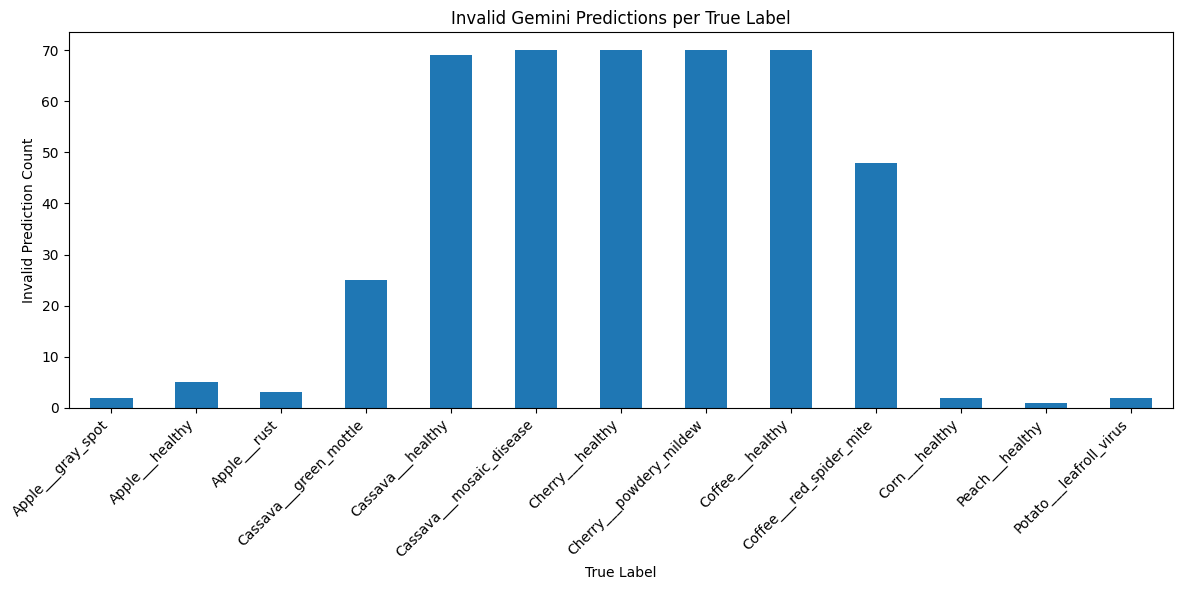

In [22]:
# # Plot bar chart
df_invalid_labels.set_index("True Label")["Invalid Count"].plot(kind="bar", figsize=(12, 6))
plt.ylabel("Invalid Prediction Count")
plt.title("Invalid Gemini Predictions per True Label")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Data Transformation

In [23]:
df_group = df_gemini_clean.copy()

# Split the 'True Label' column and convert to lowercase
df_group[['Plants', 'Disease']] = df_group['True Label'].str.split('___', expand=True).map(lambda x: x.lower() if isinstance(x, str) else x)
df_group.pop('True Label')

# Insert at the beginning
df_group.insert(0, 'True Label', df_group.pop('Disease'))
df_group.insert(0, 'Plants', df_group.pop('Plants'))
df_group['Plants'] = df_group['Plants'].str.replace("_"," ")

# To lower case of True Label 
df_group["True Label"] = df_group["True Label"].str.replace("_"," ")

#Insert Local Plants
df_group.insert(len(df_group.columns), "Local Plants",df_local_clean["Predicted Label"].str.split('___', expand=True)[0].str.replace("_"," ").map(lambda x: x.lower() if isinstance(x, str) else x))

# Insert Local prediction to lower case
df_group.insert(len(df_group.columns), "Local Prediction",df_local_clean["Predicted Label"].str.split('___', expand=True)[1].str.replace("_"," ").map(lambda x: x.lower() if isinstance(x, str) else x))

#Insert Gemini Prediction to lower case
gemini_prediction = df_group.pop('Gemini Prediction').to_frame()

# Insert Gemini Label to lower case
df_group.insert(len(df_group.columns), "Gemini Plants",gemini_prediction['Gemini Prediction'].str.split('___', expand=True)[0].str.replace("_"," ").map(lambda x: x.lower() if isinstance(x, str) else x))

# Insert Gemini prediction to lower case
df_group.insert(len(df_group.columns), "Gemini Prediction",gemini_prediction['Gemini Prediction'].str.split('___', expand=True)[1].str.replace("_"," ").map(lambda x: x.lower() if isinstance(x, str) else x))


#Remove filename
filename = df_group.pop('Filename')

# Enforce as Strings
df_group['True Label'] = df_group['True Label'].astype(str)
df_group['Local Prediction'] = df_group['Local Prediction'].astype(str)
df_group['Gemini Prediction'] = df_group['Gemini Prediction'].astype(str)

In [24]:
# print(df_group["Plants"].unique())
# print(df_group["Gemini Plants"].unique())
# print(df_group["True Label"].unique())
# print(df_group["Gemini Prediction"].unique())

In [25]:
df_group

,Plants,True Label,Local Plants,Local Prediction,Gemini Plants,Gemini Prediction
0,apple,alternaria leaf spot,tomato,late blight,apple,rust
1,apple,alternaria leaf spot,apple,cedar apple rust,apple,brown spot
2,apple,alternaria leaf spot,apple,black rot,apple,alternaria leaf spot
3,apple,alternaria leaf spot,apple,cedar apple rust,apple,rust
4,apple,alternaria leaf spot,apple,healthy,apple,healthy
...,...,...,...,...,...,...
2148,potato,mosaic virus,tomato,late blight,potato,mosaic virus
2149,potato,mosaic virus,tomato,spider mites two-spotted spider mite,potato,healthy
2150,potato,mosaic virus,strawberry,leaf scorch,potato,mosaic virus
2151,potato,mosaic virus,tomato,spider mites two-spotted spider mite,potato,mosaic virus


# Analysis by Plants

In [27]:
#Compare by plants Gemini
df_correct = pd.DataFrame()
df_correct["Gemini Correct Plant"] = (
    df_group["Plants"].str.lower().str.strip() == 
    df_group["Gemini Plants"].str.lower().str.strip()
)
#Compare by plants local
df_correct["Local Correct Plant"] = (
    df_group["Plants"].str.lower().str.strip() == 
    df_group["Local Plants"].str.lower().str.strip()
)

## Local

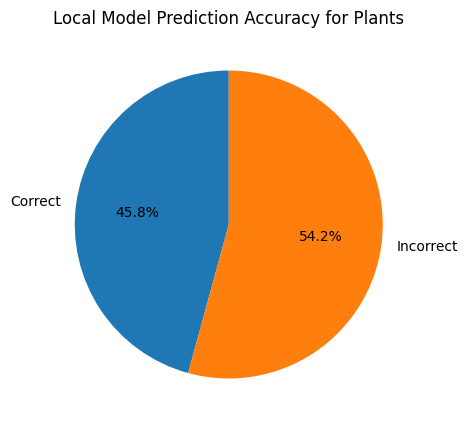

In [28]:
counts = df_correct["Local Correct Plant"].value_counts().reindex([True, False], fill_value=0)
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=["Correct", "Incorrect"], autopct='%1.1f%%', startangle=90)
plt.title("Local Model Prediction Accuracy for Plants")
plt.show()

## Gemini

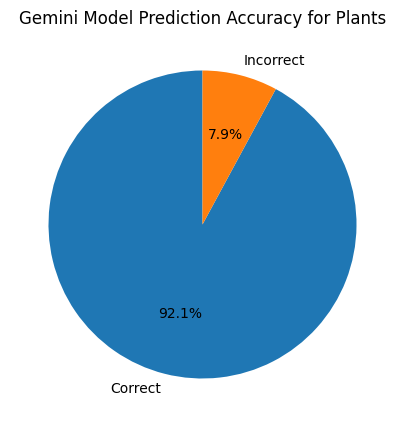

In [29]:
counts = df_correct["Gemini Correct Plant"].value_counts().reindex([True, False], fill_value=0)
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=["Correct", "Incorrect"], autopct='%1.1f%%', startangle=90)
plt.title("Gemini Model Prediction Accuracy for Plants")
plt.show()

## Local vs Gemini Plants

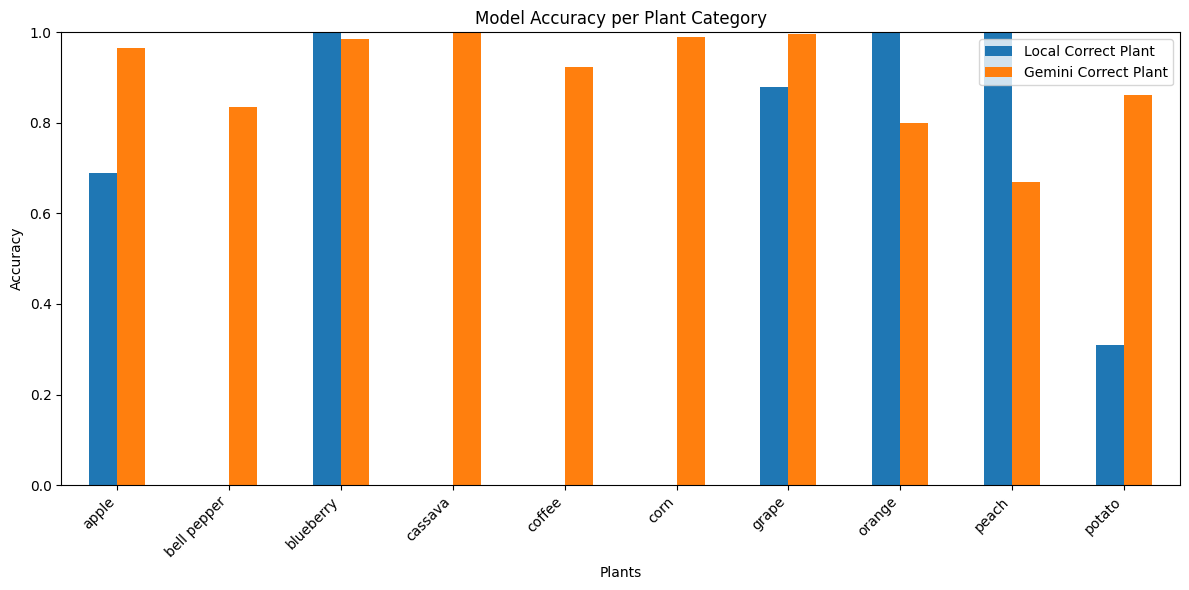

In [30]:
# Group by 'Plants' and calculate accuracy (mean of True/False is % correct)
grouped_accuracy = pd.DataFrame()
grouped_accuracy["Plants"] = df_group['Plants']
grouped_accuracy = grouped_accuracy.join(df_correct)

# Plot bar chart
grouped_accuracy.groupby("Plants")[["Local Correct Plant", "Gemini Correct Plant"]].mean().plot(kind="bar", figsize=(12, 6), ylim=(0, 1))
plt.ylabel("Accuracy")
plt.title("Model Accuracy per Plant Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Analysis by True Label

In [31]:
#Compare by plants Gemini
df_correct["Gemini Correct True Label"] = (
    df_group["True Label"].str.lower().str.strip() == 
    df_group["Gemini Prediction"].str.lower().str.strip()
)
#Compare by plants local
df_correct["Local Correct True Label"] = (
    df_group["True Label"].str.lower().str.strip() == 
    df_group["Local Prediction"].str.lower().str.strip()
)

## Local

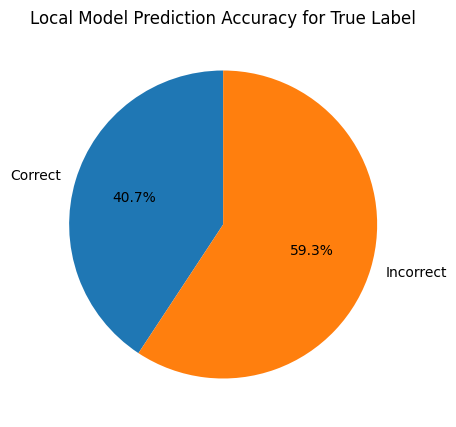

In [32]:
counts = df_correct["Local Correct True Label"].value_counts().reindex([True, False], fill_value=0)
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=["Correct", "Incorrect"], autopct='%1.1f%%', startangle=90)
plt.title("Local Model Prediction Accuracy for True Label")
plt.show()

## Gemini

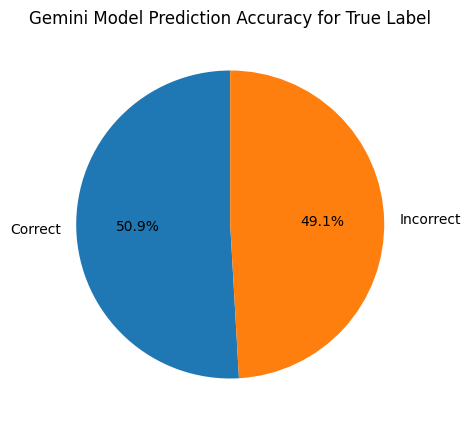

In [33]:
counts = df_correct["Gemini Correct True Label"].value_counts().reindex([True, False], fill_value=0)
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=["Correct", "Incorrect"], autopct='%1.1f%%', startangle=90)
plt.title("Gemini Model Prediction Accuracy for True Label")
plt.show()

## Local vs Gemini True Label

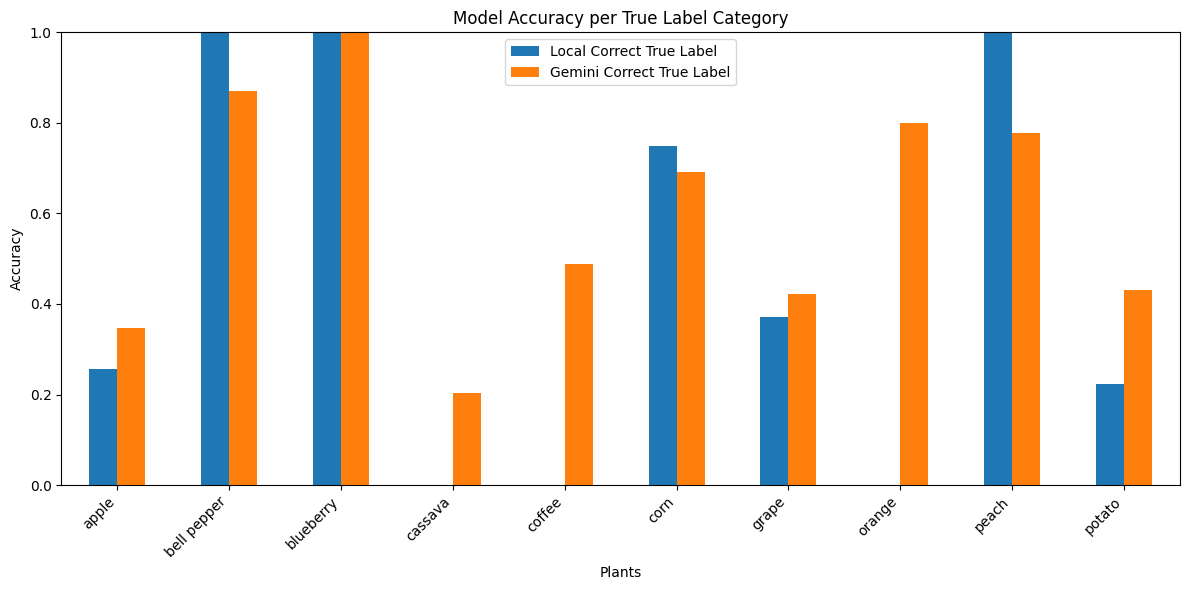

In [34]:
# Group by 'Plants' and calculate accuracy (mean of True/False is % correct)
grouped_accuracy = grouped_accuracy.join(df_correct["Gemini Correct True Label"])
grouped_accuracy = grouped_accuracy.join(df_correct["Local Correct True Label"])


# Plot bar chart
grouped_accuracy.groupby("Plants")[["Local Correct True Label", "Gemini Correct True Label"]].mean().plot(kind="bar", figsize=(12, 6), ylim=(0, 1))
plt.ylabel("Accuracy")
plt.title("Model Accuracy per True Label Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Analysis By Plants and True Label

In [35]:
#Compare by plants Gemini
df_correct["Gemini Correct Plants + True Label"] = (
    (
    df_group["Plants"].str.lower().str.strip()
        +
    df_group["True Label"].str.lower().str.strip() 
    ) == 
    (
    df_group["Gemini Plants"].str.lower().str.strip()
        +
    df_group["Gemini Prediction"].str.lower().str.strip()
    )
)
#Compare by plants local
df_correct["Local Correct Plants + True Label"] = (
    (
    df_group["Plants"].str.lower().str.strip()
        +
    df_group["True Label"].str.lower().str.strip() 
    ) == 
    (
    df_group["Local Plants"].str.lower().str.strip()
        +
    df_group["Local Prediction"].str.lower().str.strip()
    )
)

## Local

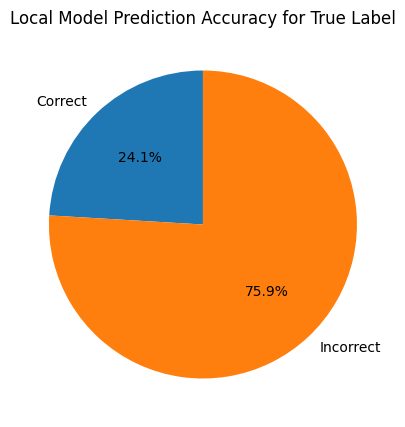

In [36]:
counts = df_correct["Local Correct Plants + True Label"].value_counts().reindex([True, False], fill_value=0)
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=["Correct", "Incorrect"], autopct='%1.1f%%', startangle=90)
plt.title("Local Model Prediction Accuracy for True Label")
plt.show()

## Gemini

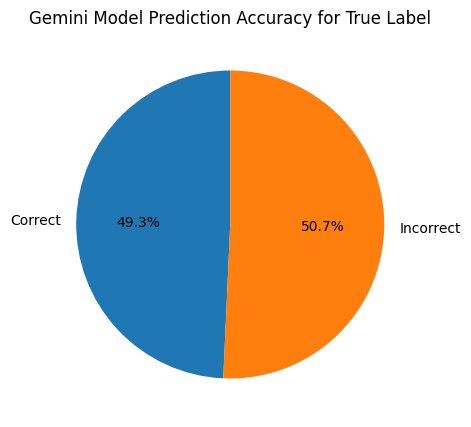

In [37]:
counts = df_correct["Gemini Correct Plants + True Label"].value_counts().reindex([True, False], fill_value=0)
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=["Correct", "Incorrect"], autopct='%1.1f%%', startangle=90)
plt.title("Gemini Model Prediction Accuracy for True Label")
plt.show()

## Local vs Gemini Plants + True Label

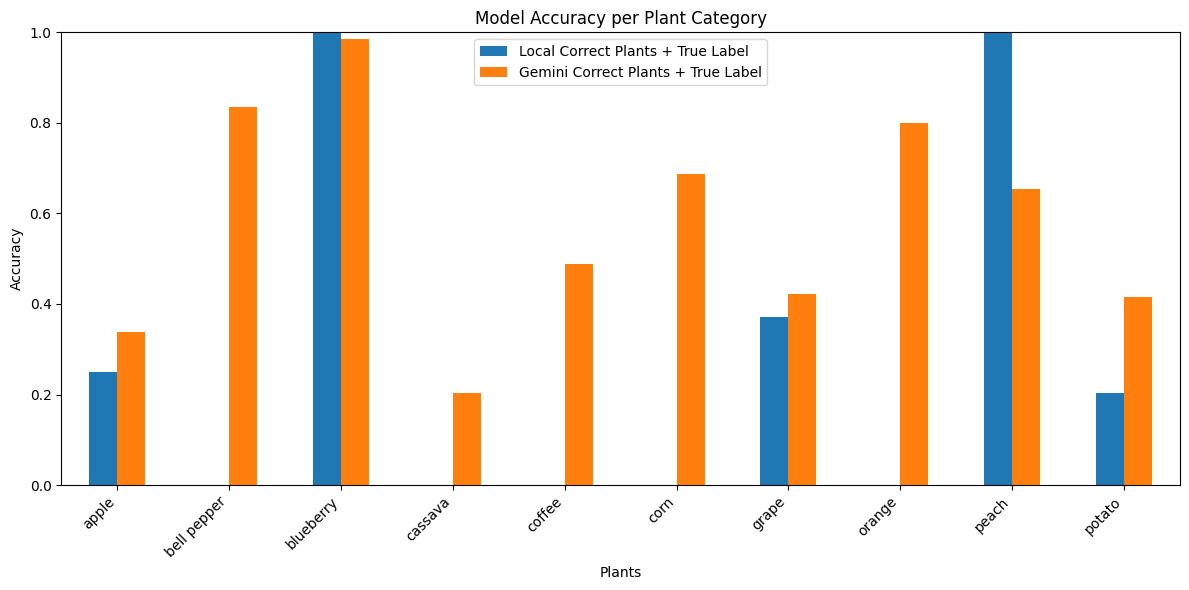

In [38]:
# Group by 'Plants' and calculate accuracy (mean of True/False is % correct)
grouped_accuracy = grouped_accuracy.join(df_correct["Gemini Correct Plants + True Label"])
grouped_accuracy = grouped_accuracy.join(df_correct["Local Correct Plants + True Label"])


# Plot bar chart
grouped_accuracy.groupby("Plants")[["Local Correct Plants + True Label", "Gemini Correct Plants + True Label"]].mean().plot(kind="bar", figsize=(12, 6), ylim=(0, 1))
plt.ylabel("Accuracy")
plt.title("Model Accuracy per Plant Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()